# Ziel
Im Tutorial 2 von https://pv4ing.ch sind drei Übungen vorgesehen. Die erste Übung erstellt eine Zeitreihe mit fiktiven Daten. Die zweite Übung verwendet Messdaten als Zeitreihe und die dritte Übung führt eine Berechnung der Jahresstrahlungsenergie durch, bei unterschiedlichen Ausrichtungen.

# Übung 1: Einstieg
Zuerst machen wir eine einfache Zeitreihenrechnung.

### Schritt 1 - Synthetische Messwerte für 1 Tag
Im folgenden Beispiel, nehmen wir keine realen Messwerte, sondern "bauen" uns selbst die Messwerte über die Sinusfunktion. Zuerst erstellen wir einen Array (Zahlenreihe) für die Zeit. Wir nehmen an, dass die Sonne um 6:00 aufgeht und um 18:00 untergeht. Über Mittag erreicht die Strahlung einen Wert von 650 W/m2. 

In [2]:
# Bibliotheken Import
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Funktionsdefinition
cos  = lambda arg : np.cos(np.deg2rad(arg))
sin  = lambda arg : np.sin(np.deg2rad(arg))
acos = lambda arg : np.rad2deg(np.arccos(arg))
asin = lambda arg : np.rad2deg(np.arcsin(arg))

t = np.linspace(6,18,1000)
H = 650 * sin((t-6)/(18-6)*180)

Wir haben ein Strahlungsarray H generiert, eine Zahlenreihe mit Strahlungswerte in W/m2. Beachte das die Funktion sin() oben mit dem lambda-Operator definiert wurde und in Grad angegeben wird. 

Überprüfe ob der Zeitarray aus lauter Spaltenwerte (Zeile mit vielen Zahlen) oder aus lauter Zeilenwerte (Spalte mit vielen Zahlen) besteht. Spalte = column. Zeile = row.

In [3]:
t.shape

(1000,)

Stelle den Strahlungsverlauf als Liniendiagramm mit der Linienfarbe grün (g=green) dar.

Text(0, 0.5, 'Strahlung [W/m2]')

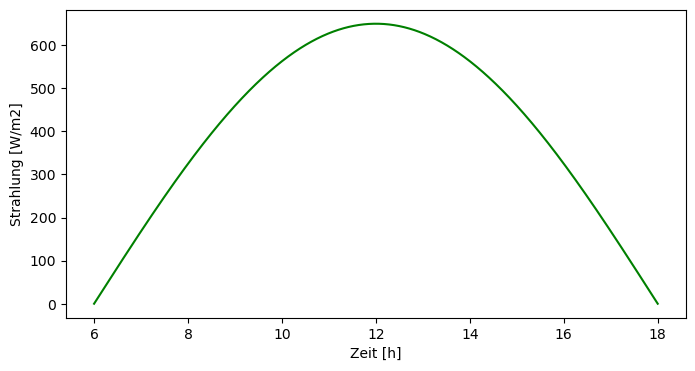

In [4]:
plt.figure(2, figsize=(8,4))
plt.plot(t,H, 'g')
plt.xlabel('Zeit [h]')
plt.ylabel('Strahlung [W/m2]')

Nun können wir die Strahlungsenergie $W_H$ für diesen einen Tag berechnen. Beachte das die Berechung der "Energie = Leistung mal Zeit" ist. Hier ist der Zeitschritt "deltaT" relevant.

Die Jahresstrahlungsenergie geben wir als String aus in der Form:
"Strahlungsenergie 5 kWh auf 1.0 m2 Fläche in einem Tag"

Es wird ein Sting erstellt indem das Rechenergebnis wH und die Fläche A eingebaut wird über <b>f-String</b>. Der Variableninhalt wird mit {} im Text angegeben. Mit Doppelpunkt nach dem Variabelnamen kann die Formattierung angegeben werden, wie z.B. Float mit 2 Nachkommastellen "1.2f".

In [5]:
A = 1 # Fläche 1 m2
deltaT = t[1] - t[0]
wH = np.sum(H)*deltaT*A/1000
print(f'Strahlungsenergie {wH:1.2f} kWh auf {A} m2 Fläche in einem Tag')

Strahlungsenergie 4.97 kWh auf 1 m2 Fläche in einem Tag


### Schritt 2 - Synthetische Messwerte für 7 Tag
Nun wollen wir die Strahlungsenergie von 7 Tagen berechnen, von Stunde 0 bis Stunde 7 x 24. Die Sinusfunktion liefert uns für die Nacht (18:00 bis 6:00) negative Werte. Wir korrigieren die negativen Strahlungswerte zu 0 indem wir die Indexierung von Python verwenden.

In [6]:
H[H<0] = 0

Der Ausdruck "H<0" generiert ein Selektor-Array der Länge von H, bei dem die einzelnen Positionen mit "1" oder "True" gekennzeichnet sind, bei welchen "Wert < 0" zutrifft. Der Ausdruck H[Selektor-Array] = 0 weisst allen selektierten Positionen eine 0 zu. 

Denkbar ist auch "M[N<1] = 2". M und N können unterschiedliche Inhalte haben, müssen aber gleich lange Arrays sein. Im Array M werden alle Stellen auf 2 gesetzt, bei denen der Wert im Array "N < 1" zutriff.

### Nun haben wir folgende Punkte gelernt:
1. Erstellen eines Arrays.
2. Liniendiagramm inklusiv Beschriftung.
3. Berechnen eines Flächenintegrals aus diskreten Werten, d.h. Aufsummieren von Werten.
4. Ergebnisse als formatierbare Zahlen zusammen mit Text ausgeben.
5. Erstellen eines Array über mehrere Tag mit der Verwendung der Indexierung

# Übung 2: Berechnung Strahlungsenergie von mehreren Tagen mit Messdaten
Nun verwenden wir nicht "künstliche" Strahlungswerte, generiert durch die Sinusfunktion, sondern reale Messwert. Hierzu benötigen wir eine Datendatei. Wir erstellen einen Plot über 7 Tage mit der Globalstrahlung "hGlob", der Diffusstrahlung "hDif" und der Direktstrahlung "hDir". 

Bei Energiesimulationen ist es empfehlenswert **als Kommentar die Einheit anzugeben**, sodass verständlich ist um was es sich handelt, z.B. [grad] oder [radiant] oder [W] oder [kWh].

Verwende für diese Übung ein neues py-File und importiere wieder die benötigten Bibliotheken (numpy, matplotlib, datetime).

## Datenimport mit Pandas
Zum Importieren verwenden wir die Bibliothek Pandas. Diese zeichnet sich durch gute Verarbeitung von Daten aus, vorallem Zeitreihen. Das Einlesen geht mittels **read_csv**, dabei erhalten wir ein **DataFrame** (df). Dies ist vergleichbar mit einem Excel-Tabellenblatt mit einem Header, d.h. Überschriftzeile und Links einem laufenden Index. 

Wir verwenden Umweltdaten (Strahlung und Temperatur) von PVGIS über ein Jahr. Diese Daten werden als TMY (Typical Meteorological Year) bezeichnet und setzen sich aus typischen Monatszeitreihen von unterschiedlichen Jahren zusammen und ergeben ein "typisches" Jahr. Dies erkennt man auch am Zeitstempel der Daten welche mehrere Jahre abdecken, jedoch nur 8760 Datensätze beinhaltet, für 1 Jahr. D.h. auch das wir den Zeitstempel nicht gebrauchen können und wir diesen neu definieren. Zuerst zum Download der Daten:

Wir öffnen mit dem Browser PVGIS und wählen einen Ort und laden die Daten als csv-Datei.
![pvgis](pvgis.png)

Sieh dir die csv-Datei mit dem Texteditor an. Beim Öffnen mit Excel kann das Zahlenformat und Dateiformat in das durch das Windowsbetreibssystem festgelegt format geändert werden, d.h. bei Öffnen mit Excel nicht speichern. 

Beim umbennenen auf *pvgis.csv* achte darauf, dass beim Dateimanager die **Dateinamenerweiterung (filename extension) eingeblendet ist**. Ansonst lautet der Dateiname pvgis.csv.csv und der untenstehende Code für read_csv funktioniert nicht.

Die Datei enthält einige Information zu Beginn und am Ende. Bei Einlesen sollen dies Informationen ignoriert werden. Dies wird mit **skiprows** und **skipfooter** angegeben. Diese Funktionen sind mit **engine = 'python'** verfügbar. Standardmässig verwendet read_csv die 'c'-engine, da diese schneller ist, jedoch nicht so mächtig. 

In [7]:
import pandas as pd

df = pd.read_csv('pvgis.csv', delimiter=',', decimal='.', skiprows = 16, skipfooter = 11, header = 0, engine = 'python')
hGlo  = df['G(h)'].values    # [W/m2] 
hDif  = df['Gd(h)'].values   # [W/m2]
hDNI  = df['Gb(n)'].values   # [W/m2]
tAmb  = df['T2m'].values     # [°C]
lfStd = np.linspace(0,8759, 8760)
deltaT = 1 # Zeitintervall 1 Stunde

Pandas erkennt automatisch, welche Daten "strings" sind und welche Daten "Zahlen", d.h. float sind. Pandas erkennt aber nicht das Datumsformat. Hier helfen wir, indem wir das Format angeben und die Zeitwerte als maschinenlesbares Format in eine neue Spalte **tutc** speichern.

Nach dem Import, schau dir die importen Daten als DataFrame (df) an, mit
 - print(df) oder
 - print(df.shape) oder
 - list(df) oder
 - describe(df).

Zum Rechnen verwenden wir Numpy-Array, d.h. wir nehmen die Daten aus dem DataFrame (df) in dem wir über den Spaltennamen, in eckiger Klammer, auf die Spalte zugreifen und die Werte (values) auslesen, oben im Code beschrieben.

Für die Sonnenstandsberechnung benötigen wir einen Array mit laufenden Stunden "lfStd", beginnend mit Stunde 0 bei Jahresanfang. Die PVGIS-Daten über TMY (Typical Meteorological Year) wurden aus Monatsmessdaten von unterschiedlichen Jahren zusammengestellt. Wir verwenden die Daten für eine Jahressimulation, weshalb wir einen neuen Zeit-Array erstellen, mit der selben Länge wie die Daten über den obigen Code mit np.linspace(...)

### Exkurs API
Die PVGIS Daten wurden über eine csv-Datei und pandas in Python importiert. Es besteht weiters die Möglichkeit die Daten direkt von der PVGIS-Webpage in Python zu laden. Dies erfolgt über die Webadresse bzw. url, welches als "API" bezeichnet wird (Application Programming Interface). Die Daten von der Webpage werde wie oben mit "read_csv" in ein Dataframe umgewandelt.

Die Daten stammen von PVGIS-SARAH2 von CM SAF (Climate Monitoring Satellite Application), d.h. Auswertung von Satellitenbildern.

In [8]:
import requests
import io

bg  = 47.173
lg = 9.473

url = 'https://re.jrc.ec.europa.eu/api/v5_2/tmy?lat='+ str(bg) + '&lon=' + str(lg) + '&outputformat=csv'
res = requests.get(url, timeout=30)
csv = res.content
df = pd.read_csv(io.BytesIO(csv), delimiter=',', decimal='.', skiprows = 16, skipfooter = 11, header = 0, engine = 'python')
df['utc'] = pd.date_range(start='20220101 00:00', end='20221231 23:00', freq='H') # erzeugt Zeitvektor da dieser bei den TMY nicht kontinuirlich steigend ist
df = df.set_index(['utc']) # ermöglicht resample der Daten

print(df.shape)
print(list(df))

lfStd = np.linspace(0,8759, 8760)
deltaT = 1 # Zeitintervall 1 Stunde

(8760, 10)
['time(UTC)', 'T2m', 'RH', 'G(h)', 'Gb(n)', 'Gd(h)', 'IR(h)', 'WS10m', 'WD10m', 'SP']


## Importierte Daten ansehen und Energie berechnen
Es werden die importierten Leistungsdaten dargestellt. Durch Aussummieren erhalten wir die Energie.
### Schritt 1
Es soll die Globalstrahlung in grün, Direktstrahlung in rot und Diffusstrahlung in blau dargestellt werden. Weiter soll in der Plot-Figure eine Legende mit den Kurvennamen dargestellt werden. Als Ausschnitt wollen wir die ersten 7 Tage betrachten, d.h. in der Plotfunktion grenzen wir den Array ein durch lfStd[a:e], wobei a für den Anfangsindex und e für den Endindex steht.

### Schritt 2
Wenn wir den ersten Tag im Plot ansehen, so fällt auf, dass negative Strahlungswerte vorkommen. Dies entspricht den Messergebnissen aber nicht der Realität. Deshalb sollen die Strahlungsdaten bereinigt werden.
 

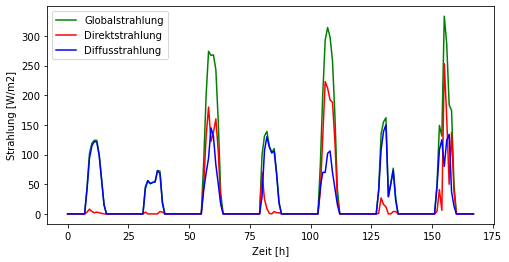

In [8]:
hDir = hGlo - hDif

hDir[hDir<0] = 0
hDif[hDif<0] = 0
hGlo[hGlo<0] = 0

a=int(0)           # Anfangstag
e=int(7*24)        # Endtag
t = lfStd[a:e]

plt.figure(3, figsize=(8,4))# Grösse des Plots (figsize) in Zoll
plt.plot(t,hGlo[a:e],'g', label ='Globalstrahlung')
plt.plot(t,hDir[a:e],'r', label ='Direktstrahlung')
plt.plot(t,hDif[a:e],'b', label ='Diffusstrahlung')
plt.xlabel('Zeit [h]');
plt.ylabel('Strahlung [W/m2]');
plt.legend(loc="upper left")

### Schritt 3
Nun berechnen wir die Strahlungsenergie über das gesamte Jahr. Die Ausgabe der Zahlen soll ohne Nachkommastellen erfolgen, deshalb wird die Zahl als formatierter String mit f'string text' (PEP498 Literal String Interpolation). 

In [9]:
wGlo = np.sum(hGlo)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Globalstrahlung
wDir = np.sum(hDir)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Direktstrahlung
wDif = np.sum(hDif)*deltaT/1000 # [kWh/m2] Jahresstrahlungsenergie Diffusstrahlung
p1=wGlo/wGlo*100 # Berechnung Prozent
p2=wDir/wGlo*100
p3=wDif/wGlo*100
print(f'Global {wGlo:4.0f} kWh/m2 entspricht {p1:3.0f} %')
print(f'Direkt {wDir:4.0f} kWh/m2 entspricht {p2:3.0f} %')
print(f'Diffus {wDif:4.0f} kWh/m2 entspricht {p3:3.0f} %')

Global 1237 kWh/m2 entspricht 100 %
Direkt  692 kWh/m2 entspricht  56 %
Diffus  545 kWh/m2 entspricht  44 %


Zur Kontrolle: vergleiche die Jahresglobalstrahlungsenergie für diesen Standort mit den Werten aus PVGIS. In PVGIS wird die Jahresstrahlungsenergie als *Yearly in-plane irradiation [kWh/m2]* bezeichnet.

### Nun haben wir folgende Punkte gelernt:
1. Umweltdaten in einem maschinenlesbaren Format zu organisieren über PVGIS und TMY
2. Importieren von Messdaten mit Pandas.
3. Bereinigen eines Array (z.B. Nullsetzten bei negativen Werten) mit der Indexierung.

# Übung 3: Strahlung auf eine geneigte Fläche
Bisher betrachteten wir die Strahlung auf die Horizontale. Horizontal weil die Messgeräte horizontal aufgestellt sind. Über die Aufteilung der Globalstrahlung in Diffus- und Direktstrahlung kann die Strahlung auf eine beliebige Fläche berechnet werden.

### Schritt 1
Berechne für einen beliebigen Ort die Jahresstrahlungsenergie bei unterschiedlichen Neigungen. Verwende PVGIS als Datenquelle für Strahlungsdaten. Berechne mit dem 3K-Modell (Dreikomponentenmodell) die Strahlung auf eine beliebig ausgerichtete Fläche.Das Dreikomponentenmodell und die Sonnenstandsberechnung ist im Manuskript "Photvoltaik für Ingenieure" beschrieben.

**Ziel ist ein Liniendiagramm mit der Jahresstrahlungsenergie** bei einer Modulausrichtung nach Süden (Azimut 0°). Auf der horizontalen x-Achse ist die Modulneigung und auf der vertikalen y-Achse die Jahresstrahlungsenergie.

#### Aufbau des Code-Beispiels: 
Mit dem 3K-Modell wird die Strahlungsleistung übers gesamte Jahr berechnet. Am Ende wird die Jahresenergie (wH) mit deltaT multipliziert und aufsummieren. Wir erhalten die Jahresstrahlungsenergie

Um diese Code-Zeilen wird eine for-Schleife gelegt um die Neigung zu variieren.

Weitere Hinweise zum Code:
 - Bei der Berechnung des Direktstrahlungsanteils ist eine Division von sin(h) notwendig. Wenn h = 0 ist, führt dies zu Problemen in der Berechnung, weshalb die Werte auf eine Sonnenhöhe von $5^\circ$ limitiert werden. Implementierung sieht wie folgt aus, anstatt sin(h) wird np.maximum(sin(h),sin(5)) verwendet.
 - Bei der Python-Implementierung ist darauf zu achten das "np.maximum()" verwendet wird, anstatt "max"! Diese Funktionen sind nicht identisch. Überprüfe den Unterschied. np.maximum ermittelt elementweise das Maximum bei zwei Array's.
 - Bei der Berechnung der Direktstrahlungskomponente wird der Zwischenwinkel $\Theta$ benötigt. Ist dieser über 90° heisst dies das die Direktstrahlung hinter dem Modul ist. Deshalb müssen diese Werte korrigiert werden.

    theta[theta>90] = 90
    
    Bei genauerer Betrachtung der Berechnung ist nicht $\Theta$ in der Berechnung notwendig, sondern $cos(\Theta)$. Die Korrektur sieht dann wie folgt aus:

    cosTheta[cosTheta<0] = 0

### Schritt 2
Zur Kontrolle:
 - Stelle den Sonnenstand dar (Azimut und Sonnenhöhe)
 - Vergleiche die Ergebnisse mit PVGIS. Beachte das die Jahresstrahlungsenergie in kWh/m2 angegeben wird. In PVGIS ist dies "H" nicht "E". Trage die PVGIS-Werte ebenfalls ins Diagramm ein.

### Schritt 3
**Aufgabe Optimale Ausrichtung:** Variiere nun ein weiterer Parameter. Neben der Neigung soll die Ausrichtung, d.h. der Azimut variiert werden. Auch hier wieder Jahresberechnung der Jahresstrahlungsenergie. Das Ergebnis ist ein 3D-Plot oder eine Höhenliniendarstellung auch Contour-Plot genannt. 

# Zusammenfassung Tutorial 2
### Übung 1
Energie ist Leistung mal Zeit. Leistungswerte werden summiert und mit DeltaT multipliziert.

### Übung 2
Importieren von Daten und Darstellen.

### Übung 3
Die Berechnung der Jahresenergie erfolgt vektoriell.

Zwei ineinander verschachtelte for-Schleifen! Es werden zwei Parameter variiert, deshalb x-, y-, z-Achse. Für jeden Datenpunkt erfolgt eine Jahressimulationen. Im Beispiel wurde die Neigungen und die Ausrichtungen variiert deshalb zwei for-Schleifen. 

# Weitere Informationen zu Energiesystemberechnung

Bisher verwendeten wir die Umweltdaten Strahlung und Tempertaur. Für Berechnungen zu Eigenverbrauchsquote, Autarkie, Warmwassererwärmung benötigen wir Lastprofiele. Das Lastprofil ist syntetisch erstellt und sieht wie folgt aus:

<img src="loadProfile.png" style="width: 600px;">

Wir verwenden die csv-Datei auf github https://github.com/markstaler/pv4ing. Mit "save_as" kann die Datei gespeicher werden. Achtung, wenn eine csv-Datei angeklickt wird, so wird diese standardmässig mit Excel geöffnet, dabei formatiert Excel die Zahlen, Datum, Uhrzeit um, mit den Einstellungen des Betriebssystems. Dies geht in 9 von 10 Fällen gut, aber nicht immer. Deshalb die Daten nicht speichern, beim Öffnen mit Excel. Besser die Datei mit dem Editor/Notepad öffnen.

Im DataFrame ist das Datum und die Uhrzeit angegeben, jedoch als Text-String und für pandas nicht verständlich. Dieser Text-String wandeln wir in ein maschinenlesbares Format um, hierbei geben wir das Format des Datums und der Uhrzeit an. 


Anschliessend legen wir diese Spalte mit Datum und Uhrzeit als Index fest (set_index) und die ursprüngliche Spalte "Time" wird gelöscht. Mit der Festlegung von datetime als Index weiss pandas dass es sich um eine Zeitreihe handelt und kann diese, sofern gewünscht in eine beliebige Auflösung umrechnen mit **resample**.

Im untenstehenden Beispiel wird die Auflösung (=Frequenz) mit 30 Minuten definiert durch "30T" und die Mittelwerte in diesem Zeitintervall berechnet. Die Formatierung ist definiert durch [DateOffset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offsets). Anstatt des Mittelwerts könnte auch der Minimalwert, Maximalwert, Summenwert, u.s.w. berechnet werden - resample ist ein sehr mächtiges Instrument.

Zum Rechnen verwenden wir Numpy-Array welche über values vom DataFrame auslesen werden.

In [10]:
## Daten importieren
df = pd.read_csv('2017_DataExport15min.csv', delimiter=';', decimal='.', header = 0)
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S' ) 
df = df.set_index(['Time']) # Datetime als Index definieren
df = df.resample('30T').mean() # Die Daten werden "resampled" zu 30 min Werte

hGlo  = df['hGlo'].values    # [W/m2] 
hDif  = df['hDif'].values    # [W/m2]
tAmb  = df['Tamb'].values    # [°C]
pVer  = df['Pload'].values   # [W] Verbrauchsprofil
zapf  = df['Zapfung'].values # [l/15min] Profil für Warmwasserbezug

Für die Sonnenstandsberechnung benötigen wir einen Array mit laufenden Stunden "lfStd", beginnend mit Stunde 0 bei Jahresanfang um die Zeitreihenberechnung umzusetzten.

Nun kann es sein, dass die einglesenen Daten zu einem beliebigem Zeitpunkt beginnen, die laufenden Stunden sind aber mit 1.Januar definiert, deshalb berechnen wir die Zeitdifferenz (zDif) zum 1.Januar des Jahres vom ersten Messwert.

Die Zeitdifferenz (zDif) ist im Format Timedelta, welches wir mit "total_seconds)" in ein Array mit Zahlen umwandeln. Die Zahlen sind Sekunden, welche wir in Stunden umrechnen, jedoch ist es nach wievor ein pandas-Array und wir benötigen ein Numpy-Array. Die erfolgt mit "lfStd.values" oder alternativ mit "np.array(lfStd).

In [11]:
zDif = df.index - dt.datetime(df.index[0].year, 1, 1, 0)
lfStd = zDif.total_seconds() # Pandas-Array mit Sekunden
lfStd = lfStd/3600 # Pandas-Array mit Stunden
lfStd = lfStd.values # Numpy-Array mit Zahlenwerte. Alternativ: lfStd = np.array(lfStd)

deltaT = lfStd[1] - lfStd[0] # [h] Auflösung
tutc = df.index

Wir haben folgendes gelernt:
1. Importieren von Daten mit Pandas inklusiv Datum und Zeit
2. Umwandeln des Datum-Zeit-Text in ein maschinenlesbares Format
3. Resample der Daten

## Simulation von einem Speicher
Für die Simulation einer Batterie ist neben der Produktion durch PV auch der Verbrauch relevant. Deshalb ist bei den Messdaten ein Lastprofil (pLoad) aufgeführt. 

Bei der Betrachtung von Produktion oder Verbrauch konnten die Zeitreihen als Array vektoriell berechnet werden, was die Simulation sehr effizient machte. Bei der Berechnung des Ladezustands einer Batterie ist der vorgängige Zustand relevant, d.h. es kann nicht mehr vektoriell gerechnet werden, sondern über eine Schleife. 

Bei der Berechnung wird jeder einzelne Zeitschritt berechnet:

#### 1. Berechnung Leistungsbedarf  (Verbrauch abzüglich Produktion)

Prüfen ob Leistungsbedarf durch die Batterie zur Verfügung gestellt werden kann:

a.) Wenn ja wird die Batterie entladen
        
b.) Wenn nicht wird die Leistung aus dem Netz bezogen, abzüglich dem Rest in der Batterie
        
#### 2. Berechnung Überschuss (Produktion abzüglich Verbrauch)

Prüfen ob Batterie nicht voll ist,

a.)	Wenn nicht kann die Batterie geladen werden bis sie voll ist, der Rest wird ins Netz rückgespeist
    
b.)	Wenn die Batterie voll ist, wird der Überschuss ins Netz rückgespeist.


   

Mit diesem Vorgehen wird die Netzbezugsenergie (wBez) und die Netzeinspeisung (wEin) berechnet (Energie = Leistung mal Zeit).

***Spätestens hier ist es sehr wichtig, wenn als Kommentar die Einheit angegeben wird, um Klarheit zu haben ob Leistung [W] oder Energie [kWh] oder [Wh] gemeint ist!***

In [12]:
### Parameterdefinition
PR          = 0.75 #[1]
pPVstc      = 6  #[kW]
batCap      = 6  #[kWh]

pPV      = hGlo*PR*pPVstc # [W] PV-Produktionsleistung

### Batterie Berechnung
wBez  = 0    # [kWh] Energie Netzbezug
wEin  = 0    # [kWh] Energie Netzeinspeisung   
wBat  = 0    # [kWh] Energie Batteriestand. Annahme das Batterie zu Beginn leer ist

pBedarf = pVer-pPV  # [W] Bedarf ist Verbrauch agzüglich Produktion, jedoch....
pBedarf[pBedarf<0]=0 #...darf der Wert nicht <0 sein (z.B. wenn PV grösser ist als Verbrauch)
for p in range(pPV.size):    
    if wBat >= pBedarf[p]*deltaT/1000:
        wBat = wBat - pBedarf[p]*deltaT/1000    # [kWh]
    else:
        wBez = wBez + pBedarf[p]*deltaT/1000 - wBat   # [kWh]
        wBat  = 0
    pUebersch = np.maximum(pPV[p]-pVer[p], 0) # [W]      
    if wBat <= batCap:
        eNichtladbar = np.maximum(pUebersch*deltaT/1000 - (batCap-wBat),0) #[kWh]
        wBat = wBat + pUebersch*deltaT/1000 - eNichtladbar                 #[kWh] 
        wEin = wEin + eNichtladbar
    else:
        wEin = wEin + pUebersch*deltaT/1000   # [kWh]

wVer = np.sum(pVer)*deltaT/1000 # [kWh] Verbrauch Jahresenergie
wPro = np.sum(pPV)*deltaT/1000  # [kWh] PV-Produktion Jahresenergie
rEV = (wPro-wEin)/wPro *100 # [%] Eigenverbrauchsquote
rA = (wVer-wBez)/wVer *100 # [%] Autarkiegrad
print(f'Eigenverbrauchsgrad ist {rEV:1.0f} %')
print(f'Autarkiegrad ist {0:1.0f} %')

Eigenverbrauchsgrad ist 52 %
Autarkiegrad ist 0 %


Mit dem obigen Code-Beispiel haben wir die Jahresenergie berechnet. Möchten wir einen zeitlichen Verlauf des Ladens und Entladens darstellen an drei Tagen im Jahr, so wird der Code erweitert, markiert mit (\***):

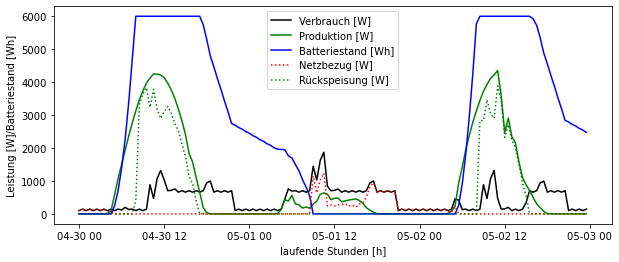

In [13]:
### es wird nur ein Ausschnitt betrachtet, nicht das gesamte Jahr
a  = int(105*24/deltaT)
e  = int(a+3*24/deltaT)
pPV      = hGlo[a:e]*PR*pPVstc  # [W]
pVer     = pVer[a:e]
tutcTeil = tutc[a:e]

# Initialisierung Array für Darstellung (***)
batStand      = np.zeros(tutcTeil.size) # Array für Batteriestand (***)
netzbezug     = np.zeros(tutcTeil.size) # Array für Netzleistungsbezug (***)
einspeisung   = np.zeros(tutcTeil.size) # Array für Einspeiseleistung (***)

### Batterie Berechnung
wBez  = 0    # [kWh] Energie Netzbezug
wEin  = 0    # [kWh] Energie Netzeinspeisung   
wBat  = 0    # [kWh] Energie Batteriestand. Annahme das Batterie zu Beginn leer ist

pBedarf = pVer-pPV  # [W] Bedarf ist Verbrauch agzüglich Produktion, jedoch....
pBedarf[pBedarf<0]=0 #...darf der Wert nicht <0 sein (z.B. wenn PV grösser ist als Verbrauch)
for p in range(pPV.size):
    if wBat >= pBedarf[p]*deltaT/1000:
        wBat = wBat - pBedarf[p]*deltaT/1000    # [kWh]
        pBezug = 0                           # [kW] (***)
    else:
        wBez = wBez + pBedarf[p]*deltaT/1000 - wBat   # [kWh]
        wBat  = 0
        pBezug = pBedarf[p] - wBat*1000/deltaT   # [W] (***)
    pUebersch = np.maximum(pPV[p]-pVer[p], 0) # [W]      
    if wBat <= batCap:
        eNichtladbar = np.maximum(pUebersch*deltaT/1000 - (batCap-wBat),0) #[kWh]
        wBat = wBat + pUebersch*deltaT/1000 - eNichtladbar                 #[kWh] 
        wEin = wEin + eNichtladbar
        pEinspeisung = eNichtladbar/deltaT*1000  # [W] (***)
    else:
        wEin = wEin + pUebersch*deltaT/1000   # [kWh]
        pEinspeisung = pUebersch              # [W] (***)
    
    # Berechnete Werte ans Array übergeben (***)
    batStand[p]  = wBat*1000      # (***)
    netzbezug[p]   = pBezug       # [W] (***)
    einspeisung[p] = pEinspeisung # [W] (***)
 
### Darstellung (***)
fig = plt.figure(6, figsize=(10,4))
plt.plot_date(tutcTeil, pVer,'k', label='Verbrauch [W]')
plt.plot_date(tutcTeil, pPV,'g', label='Produktion [W]')
plt.plot_date(tutcTeil, batStand,'b', label='Batteriestand [Wh]')
plt.plot_date(tutcTeil, netzbezug,'r:', label='Netzbezug [W]')
plt.plot_date(tutcTeil, einspeisung,'g:', label='Rückspeisung [W]')
plt.legend(loc='best')
plt.xlabel('laufende Stunden [h]')
plt.ylabel('Leistung [W]/Batteriestand [Wh]')
plt.show()

### Thermischer Speicher
Mit der selben Logik kann ein thermischer Speicher berechnet werden. Es wird von einer vollständigen Durchmischung im Speicher ausgegangen, d.h. es gibt keine Schichtung. Bei einem Energieeintrag erhöht sich die Temperatur im Speicher, was in der Praxis einer Stufenladung entspricht und keiner Schichtladung, da von keiner Schichtung ausgegangen wird.

Der Energieinhalt berechnet sich über die Speichertemperatur tsp, Kaltwassertemperatur tkw, der Dichte $\rho$ und der spezifischen Wärmekapazität von Wasser cp = 4.182 kJ/(kg K):

$W = vol \cdot \rho \cdot cp \cdot (tsp - tkw)$

Der Speicher hat folgendes Steuerverhalten: bei einer minimalen Speichertemperatur von tMin = 40 °C, wird der Heizstab über das Netz versorgt, sodass ausreichend Warmwasser erzeugt wird. Ist die Nachladung über das Netz aktiviert so bleibt diese aktiv bis der Speicher eine Temperatur von tMaxNetz = 45 °C hat (Hysteresis). Wird über PV geladen so ist die Ausschaltschwelle höher bei tMax     = 85 °C. Es kann so mehr Energie eingelagert werden. Zu berücksichtigen sind Speicherverluste von 23 W. 

In [14]:
### Thermische Speicher Berechnung
vol      = 300 # [liter] Speicherinhalt
tkw      = 12  # [°C] Kaltwassertemperatur
tMin     = 40  # [°C] min. Speichertemp. Heizung ein
tMax     = 85  # [°C] max. Speichertemp. bei PV-Ladung
tMaxNetz = 45  # [°C] max. Speichertemp. bei Netz-Ladung
thermalLosses = 23 # [W] Speicherverluste 
pHS           = 2  # [kW] Leistung Heizstab

tSp  = 45 # [°C] Sim.Starttemperatur Speicher       
wBez = 0  # [kWh] Energie Netzbezug
netzLaden = False # Flag welches Netzladung anzeigt
tSpArray = np.zeros(zapf.size)   # [°C] Array für Speichertemperatur
pThermArray = np.zeros(zapf.size)# [W] Array Leistung Heizstab
pzapfArray = np.zeros(zapf.size) # [W] Array Zapf-Leistung     

for p in range(pPV.size):
    if tSp < tMax:
        pTherm = pPV[p] # [W]
    else:
        pTherm = 0 # [W]

    if tSp > tMaxNetz:
        netzLaden = False

    if tSp < tMin:
        netzLaden = True

    if netzLaden == True:
        wBez = wBez + pHS*deltaT # [kWh]
        pTherm = pHS*1000 + pTherm # [W]

    wSp   = vol * 4.182/3.6 * (tSp-tkw) # [Wh] Energieinhalt Speicher vorher
    pzapf = zapf[p]/deltaT * 4.182/3.6 * (tSp-tkw) # [W_therm] gezapfte Leistung
    wSp   = wSp + (pTherm - pzapf - thermalLosses)*deltaT  # [Wh] Energieinhalt Speicher nachher
    tSp = wSp/(vol*4.182/3.6) + tkw # [°C]  neue Speichertemperatur
    tSpArray[p] = tSp # [°C]
    pThermArray[p] = pTherm # [W]
    pzapfArray[p] = pzapf # [W]

Dieses Tutorial wurde mit Jupyter Notebook erstellt, welches im Anaconda-Paket enthalten ist. Markus Markstaler. 2021

### Dynamische Diagramme mit Bokeh
Für eine Visalisierung eines Strahlungsverlauf übers Jahr, wäre es nützlich wenn in die Daten "gezoomt" werden könnten, ohne der Eingrenzung über die Indexe [a:e]. Dies ist möglich mit dem Paket "bokeh". Es funktionert ähnlich wie Matplotlib. Es wird eine html-Datei erzeugt (mittels "output_file('filename.html')"), welche das Diagramm enthält und Werkzeuge zum Verschieben, Zommen, usw.

In [15]:
from bokeh.io import show  
from bokeh.plotting import figure 

x = np.linspace(0,7,100)
y = np.sin(x)

p1 = figure()
p1.line(x,y)

show(p1)

Nun zur **Maximalvariante** der Bokeh-Darstellung:

Die Übergabe der Daten erfolgt direkt als Dataframe (kann auch als Array erfolgen, wie bei Matplotlib). Im Dataframe ergänzen wir die Uhrzeit als String ("tutcStr") in einem, durch uns, definierbaren Format, zuvor wurde noch eine Stunde dazugezählt um von der UTC-Zeit auf die Mitteleuropäische Zeit zu kommen.

tt steht für Tooltip und heisst das die Werte der Kennlinie ausgegeben werden an der Position wo die Maus über der Kennlinie ist. Die Daten können die Messwerte sein, mit Zugriff "@hGlo" oder der Wert aus der gezeichneten Kennlinie mit $y", welcher interpoliert wird.

Bei der Erzeugung des Diagramm-Objekt kann die Grösse eingestellt werden und die Tooltips.

Eine sehr schöne Funktion ist p1.legend.click_policy="hide" dabei können die Kurven ausgeblendet werden, wenn die jeweilige Legende angeklickt wird.

In [16]:
from bokeh.io import output_file, output_notebook, show  # Bokeh is for making charts in a browser
from bokeh.plotting import figure 
from bokeh.embed import components


# zum Dateframe ergänzen wir die Uhrzeit als Text
tmez = tutc + pd.Timedelta('1 hours') # Ursprüngliche Zeit in UTC wird in MEZ umgewandelt (+1)
tmezStr = tmez.strftime("%d.%m.%Y %H:%M")

df['tmez'] = tmez 
df['tmezStr'] = tmezStr

output_file('myHTML.html') # das Diagramm wird in einem separaten html-File exportiert
output_notebook()   # das Diagramm wirm unten im JupyterNotebook dargestellt

tt = [
      ('Zeit MEZ:', '@tmezStr'),
      ('Globalstrahlung Diagramm:', '$y'),
      ('Globalstragkzbg Messwert:', '@hGlo'),
      ]

p1 = figure(title='Strahlungsverlauf', plot_width=800, plot_height=600, 
            tooltips = tt,  
            x_axis_type='datetime')
p1.line(x='tmez',y='hGlo', source=df, legend_label = 'Global', color="green")
p1.line(x='tmez',y='hDif', source=df, legend_label = 'Diffus', color="blue")
p1.xaxis.axis_label = 'Zeit [MEZ]'
p1.yaxis.axis_label = 'Strahlung [W/m²]'
p1.legend.location = 'top_right'
p1.legend.click_policy="hide" # Kurve ein/ausschaltbar
p1.toolbar.logo = None # deaktivieren des Bokeh-Logo
show(p1)

Loading BokehJS ...